Tf-idf с биграммами и логистическую регрессию поверх этого, свою для каждого класса. И дальше просто для каждого класса в отдельности померить качество (accuracy, f-меру), и глянуть их средние по всем классам.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle
from tqdm import tqdm

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report as clf_report
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score
)

# Только field

In [ ]:
df = pd.read_json("filtered_and_field_1.json")
df.head()

In [3]:
df.shape

(2118438, 19)

In [4]:
target = [column for column in df.columns if "field_" in column]
target

['field_Art',
 'field_Biology',
 'field_Business',
 'field_Chemistry',
 'field_Geology',
 'field_Humanities',
 'field_Math',
 'field_Medicine',
 'field_Physics',
 'field_Psychology',
 'field_Social',
 'field_Tech']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df["cleaned_abstract"], df[target],
                                                   train_size=0.8, test_size=0.2,
                                                   random_state=42)

In [13]:
X_train.shape, X_test.shape

((1694750,), (423688,))

In [14]:
y_train_classes = {
    field: y_train[field] for field in target
}

In [15]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_transformed = vectorizer.fit_transform(X_train)

In [16]:
logits = {
    field: LogisticRegression(n_jobs=-1, max_iter=1_000_000, random_state=123) for field in target
}

for field, logit in logits.items():
    print(f"Fitting {field} logistic regression")
    logit.fit(X_train_transformed, y_train_classes[field])

Fitting field_Art logistic regression
Fitting field_Biology logistic regression
Fitting field_Business logistic regression
Fitting field_Chemistry logistic regression
Fitting field_Geology logistic regression
Fitting field_Humanities logistic regression
Fitting field_Math logistic regression
Fitting field_Medicine logistic regression
Fitting field_Physics logistic regression
Fitting field_Psychology logistic regression
Fitting field_Social logistic regression
Fitting field_Tech logistic regression


In [17]:
X_test_transformed = vectorizer.transform(X_test)

In [ ]:
from sklearn.metrics import classification_report as clf_report

for field in target:
    print(field.upper())
    y_pred = logits[field].predict(X_test_transformed)
    print(clf_report(y_test[field], y_pred))
    print()

FIELD_ART
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    419220
           1       0.82      0.32      0.46      4468

    accuracy                           0.99    423688
   macro avg       0.91      0.66      0.73    423688
weighted avg       0.99      0.99      0.99    423688


FIELD_BIOLOGY
              precision    recall  f1-score   support

           0       0.91      0.95      0.93    290398
           1       0.88      0.80      0.84    133290

    accuracy                           0.90    423688
   macro avg       0.89      0.88      0.88    423688
weighted avg       0.90      0.90      0.90    423688


FIELD_BUSINESS
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    411821
           1       0.75      0.44      0.56     11867

    accuracy                           0.98    423688
   macro avg       0.87      0.72      0.77    423688
weighted avg       0.98      0.98

# По сабжектам

In [4]:
df = pd.read_pickle("looong_df_subjects.pkl")
df.head()

,DOI,title,abstract,subject,cleaned_abstract,filtered_subject,all_fields,field_Art,field_Biology,field_Business,...,subj_Environmental Science (miscellaneous),subj_Biological Psychiatry,subj_Gender Studies,"subj_Safety, Risk, Reliability and Quality",subj_Urban Studies,subj_Genetics(clinical),subj_Agricultural and Biological Sciences (miscellaneous),subj_Museology,subj_Nephrology,subj_Logic
0,10.1163/1568525043083505,aristotle fr. 44 rose: midas and silenus,<jats:sec><jats:title>Abstract</jats:title><ja...,"[Classics, Linguistics and Language, Archaeolo...",abstract scholars have identified two supposed...,"[Archaeology, Classics, History, Language and ...","[Humanities, Humanities, Humanities, Humanitie...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10.1163/1568525043083532,loca loquuntur. lucretius' explanation of the ...,<jats:sec><jats:title>Abstract</jats:title><ja...,"[Classics, Linguistics and Language, Archaeolo...",abstract a discussion of the second part of lu...,"[Archaeology, Classics, History, Language and ...","[Humanities, Humanities, Humanities, Humanitie...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10.1163/1568525043083541,poverty and demography: the case of the gracch...,<jats:sec><jats:title>Abstract</jats:title><ja...,"[Classics, Linguistics and Language, Archaeolo...",abstract according to many ancient historians ...,"[Archaeology, Classics, History, Language and ...","[Humanities, Humanities, Humanities, Humanitie...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.1163/1568525043083514,old persian in athens revisited (ar. ach. 100),<jats:sec><jats:title>Abstract</jats:title><ja...,"[Classics, Linguistics and Language, Archaeolo...",abstract the old persian line in aristophanes ...,"[Archaeology, Classics, History, Language and ...","[Humanities, Humanities, Humanities, Humanitie...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10.1163/1568527053083412,religion and violence: what can sociology offer?,<jats:sec><jats:title>Abstract</jats:title><ja...,"[Religious studies, History]",abstract this essay presents a sketch of a soc...,"[History, Religious studies]","[Humanities, Humanities]",0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
target = [column for column in df.columns if "subj_" in column]
X_train, X_test, y_train, y_test = train_test_split(df["cleaned_abstract"], df[target],
                                                   train_size=0.8, test_size=0.2,
                                                   random_state=42)

In [6]:
X_train.shape

(1694750,)

In [7]:
y_train_classes = {
    subj: y_train[subj] for subj in target
}

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_transformed = vectorizer.fit_transform(X_train)

In [ ]:
from tqdm import tqdm

logits = {
    subj: LogisticRegression(n_jobs=-1, max_iter=1_000_000, random_state=123) for subj in target
}

for subj, logit in tqdm(logits.items()):
    #print(f"Fitting {subj} logistic regression")
    logit.fit(X_train_transformed, y_train_classes[subj])

In [ ]:
X_test_transformed = vectorizer.transform(X_test)

In [ ]:
accuracy = {}
recall = {}
precision = {}
f1 = {}

accs = []
recs = []
precs = []
f1s = []

min_positives = np.arange(start=0.05, stop=0.5, step=0.01)
for min_positive in tqdm(min_positives):
    for subj in target:
        #print(subj.upper())
        y_pred = logits[subj].predict_proba(X_test_transformed)
        y_pred = [1 if x[1] > min_positive else 0 for x in y_pred]
        accuracy[subj] = accuracy_score(y_test[subj], y_pred)
        recall[subj] = recall_score(y_test[subj], y_pred, zero_division=0)
        precision[subj] = precision_score(y_test[subj], y_pred, zero_division=0)
        f1[subj] = f1_score(y_test[subj], y_pred, zero_division=0)
    
    accs.append(np.mean(list(accuracy.values())))
    recs.append(np.mean(list(recall.values())))
    precs.append(np.mean(list(precision.values())))
    f1s.append(np.mean(list(f1.values())))
    
    #print(f"min_positive={min_positive}")
    '''
    print(f"Average accuracy: {np.mean(list(accuracy.values()))}")
    print(f"Average recall: {np.mean(list(recall.values()))}")
    print(f"Average precision: {np.mean(list(precision.values()))}")
    print(f"Average F1-score: {np.mean(list(f1.values()))}")
    print()'''

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].plot(min_positives, accs)
axs[0, 0].set_title("Accuracy")

axs[0, 1].plot(min_positives, recs)
axs[0, 1].set_title("Recall")

axs[1, 0].plot(min_positives, precs)
axs[1, 0].set_title("Precision")

axs[1, 1].plot(min_positives, f1s)
axs[1, 1].set_title("F1-score")

plt.show()

In [ ]:
plt.plot(min_positives[4:], recs[4:], label="Recall")
plt.plot(min_positives[4:], precs[4:], label="Precision")
plt.plot(min_positives[4:], f1s[4:], label="F1-score")
plt.legend()
plt.show()

In [ ]:
print(f"Average accuracy: {np.mean(list(accuracy.values()))}")
print(f"Average recall: {np.mean(list(recall.values()))}")
print(f"Average precision: {np.mean(list(precision.values()))}")
print(f"Average F1-score: {np.mean(list(f1.values()))}")

In [ ]:
{k: v for k, v in sorted(accuracy.items(), key=lambda x: x[1], reverse=True)}

In [ ]:
{k: v for k, v in sorted(f1.items(), key=lambda x: x[1], reverse=True)}

In [ ]:
subj = 'subj_Law'

print(clf_report(y_test[subj], logits[subj].predict(X_test_transformed)))

# Сначала field, потом subject

Возьмем df с удаленными не-английскими текстами:

In [4]:
df = pd.read_pickle("looong_df_subjects_en.pkl")
df.head()

,DOI,title,abstract,subject,cleaned_abstract,filtered_subject,all_fields,field_Art,field_Biology,field_Business,...,subj_Biological Psychiatry,subj_Gender Studies,"subj_Safety, Risk, Reliability and Quality",subj_Urban Studies,subj_Genetics(clinical),subj_Agricultural and Biological Sciences (miscellaneous),subj_Museology,subj_Nephrology,subj_Logic,lang
0,10.1163/1568525043083505,aristotle fr. 44 rose: midas and silenus,<jats:sec><jats:title>Abstract</jats:title><ja...,"[Classics, Linguistics and Language, Archaeolo...",abstract scholars have identified two supposed...,"[Archaeology, Classics, History, Language and ...","[Humanities, Humanities, Humanities, Humanitie...",0,0,0,...,0,0,0,0,0,0,0,0,0,en
1,10.1163/1568525043083532,loca loquuntur. lucretius' explanation of the ...,<jats:sec><jats:title>Abstract</jats:title><ja...,"[Classics, Linguistics and Language, Archaeolo...",abstract a discussion of the second part of lu...,"[Archaeology, Classics, History, Language and ...","[Humanities, Humanities, Humanities, Humanitie...",0,0,0,...,0,0,0,0,0,0,0,0,0,en
2,10.1163/1568525043083541,poverty and demography: the case of the gracch...,<jats:sec><jats:title>Abstract</jats:title><ja...,"[Classics, Linguistics and Language, Archaeolo...",abstract according to many ancient historians ...,"[Archaeology, Classics, History, Language and ...","[Humanities, Humanities, Humanities, Humanitie...",0,0,0,...,0,0,0,0,0,0,0,0,0,en
3,10.1163/1568525043083514,old persian in athens revisited (ar. ach. 100),<jats:sec><jats:title>Abstract</jats:title><ja...,"[Classics, Linguistics and Language, Archaeolo...",abstract the old persian line in aristophanes ...,"[Archaeology, Classics, History, Language and ...","[Humanities, Humanities, Humanities, Humanitie...",0,0,0,...,0,0,0,0,0,0,0,0,0,en
4,10.1163/1568527053083412,religion and violence: what can sociology offer?,<jats:sec><jats:title>Abstract</jats:title><ja...,"[Religious studies, History]",abstract this essay presents a sketch of a soc...,"[History, Religious studies]","[Humanities, Humanities]",0,0,0,...,0,0,0,0,0,0,0,0,0,en


In [5]:
target_1 = [column for column in df.columns if "field_" in column]
X_train, X_test, y_train, y_test = train_test_split(df["cleaned_abstract"], df[target_1],
                                                    train_size=0.08, test_size=0.02,
                                                    random_state=42)

In [6]:
y_train_fields = {
    field: y_train[field] for field in target_1
}

In [7]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_transformed = vectorizer.fit_transform(X_train)

In [10]:
logits = {
    field: LogisticRegression(n_jobs=-1, max_iter=1_000_000, random_state=123) for field in target_1
}

for field, logit in logits.items():
    print(f"Fitting {field} logistic regression")
    logit.fit(X_train_transformed, y_train_fields[field])
    with open(f"field_logits_en/{field}.pkl", "wb") as f:
        pickle.dump(logit, f)

Fitting field_Art logistic regression
Fitting field_Biology logistic regression
Fitting field_Business logistic regression
Fitting field_Chemistry logistic regression
Fitting field_Geology logistic regression
Fitting field_Humanities logistic regression
Fitting field_Math logistic regression
Fitting field_Medicine logistic regression
Fitting field_Physics logistic regression
Fitting field_Psychology logistic regression
Fitting field_Social logistic regression
Fitting field_Tech logistic regression


In [11]:
X_test_transformed = vectorizer.transform(X_test)

In [12]:
accuracy = {}
recall = {}
precision = {}
f1 = {}

accs = []
recs = []
precs = []
f1s = []

min_positives = np.arange(start=0.05, stop=0.5, step=0.01)
for min_positive in tqdm(min_positives):
    for subj in target_1:
        #print(subj.upper())
        y_pred = logits[subj].predict_proba(X_test_transformed)
        y_pred = [1 if x[1] > min_positive else 0 for x in y_pred]
        accuracy[subj] = accuracy_score(y_test[subj], y_pred)
        recall[subj] = recall_score(y_test[subj], y_pred, zero_division=0)
        precision[subj] = precision_score(y_test[subj], y_pred, zero_division=0)
        f1[subj] = f1_score(y_test[subj], y_pred, zero_division=0)
    
    accs.append(np.mean(list(accuracy.values())))
    recs.append(np.mean(list(recall.values())))
    precs.append(np.mean(list(precision.values())))
    f1s.append(np.mean(list(f1.values())))
    
    #print(f"min_positive={min_positive}")
    '''
    print(f"Average accuracy: {np.mean(list(accuracy.values()))}")
    print(f"Average recall: {np.mean(list(recall.values()))}")
    print(f"Average precision: {np.mean(list(precision.values()))}")
    print(f"Average F1-score: {np.mean(list(f1.values()))}")
    print()'''

100%|██████████| 45/45 [01:00<00:00,  1.34s/it]


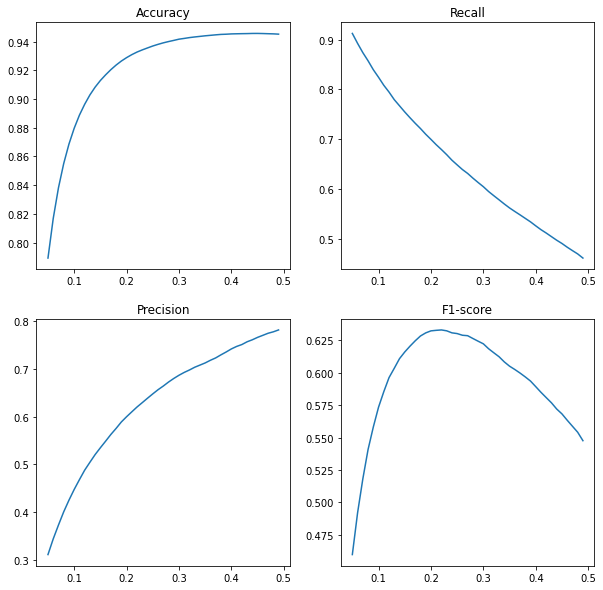

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].plot(min_positives, accs)
axs[0, 0].set_title("Accuracy")

axs[0, 1].plot(min_positives, recs)
axs[0, 1].set_title("Recall")

axs[1, 0].plot(min_positives, precs)
axs[1, 0].set_title("Precision")

axs[1, 1].plot(min_positives, f1s)
axs[1, 1].set_title("F1-score")

plt.show()

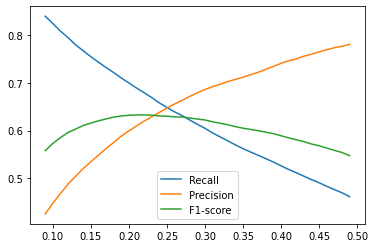

In [14]:
plt.plot(min_positives[4:], recs[4:], label="Recall")
plt.plot(min_positives[4:], precs[4:], label="Precision")
plt.plot(min_positives[4:], f1s[4:], label="F1-score")
plt.legend()
plt.show()

In [15]:
print(f"Average accuracy: {np.mean(list(accuracy.values()))}")
print(f"Average recall: {np.mean(list(recall.values()))}")
print(f"Average precision: {np.mean(list(precision.values()))}")
print(f"Average F1-score: {np.mean(list(f1.values()))}")

Average accuracy: 0.9451835055009657
Average recall: 0.4614284915275313
Average precision: 0.7808020629451464
Average F1-score: 0.5475475040077162


Добавляем предсказания филдов в качестве фичей для сабжектов:

In [16]:
X_test_copy = pd.DataFrame(X_test.copy())

for field in target_1:
    y_pred = logits[field].predict_proba(X_test_transformed)
    y_pred = [1 if x[1] > 0.2 else 0 for x in y_pred]
    X_test_copy[f"{field}_pred"] = y_pred

In [17]:
X_test_copy.sample(5)

,cleaned_abstract,field_Art_pred,field_Biology_pred,field_Business_pred,field_Chemistry_pred,field_Geology_pred,field_Humanities_pred,field_Math_pred,field_Medicine_pred,field_Physics_pred,field_Psychology_pred,field_Social_pred,field_Tech_pred
1435836,abstract a new star catalog has been derived r...,0,0,0,0,0,0,0,0,1,0,0,0
2275103,the ability to decrypt volatile plant signals ...,0,1,0,0,0,0,0,1,0,0,0,0
245895,the naturally occurring virus papillomas of we...,0,1,0,0,0,0,0,1,0,0,0,0
375136,abstract background detecting patients at risk...,0,0,0,0,0,0,0,1,0,0,0,0
2006795,abstract microplitis mediator haliday a bracon...,0,1,0,0,0,0,0,1,0,0,0,0


И начинаем предсказывать сабжекты:

In [18]:
target_2 = [column for column in df.columns if "subj_" in column]
X_train, X_test, y_train, y_test = train_test_split(df[["cleaned_abstract"] + target_1], df[target_2],
                                                   train_size=0.08, test_size=0.02,
                                                   random_state=42)

In [19]:
y_train_subjs = {
    subj: y_train[subj] for subj in target_2
}

In [20]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_transformed = vectorizer.fit_transform(X_train["cleaned_abstract"])

In [21]:
from scipy import sparse

X_train_stacked = sparse.hstack((
    X_train_transformed,
    sparse.csr_matrix(X_train[target_1])
))

In [22]:
from tqdm import tqdm

logits = {
    subj: LogisticRegression(n_jobs=-1, max_iter=1_000_000, random_state=123) for subj in target_2
}

for subj, logit in tqdm(logits.items()):
    #print(f"Fitting {subj} logistic regression")
    logit.fit(
        X_train_stacked,
        y_train_subjs[subj]
    )
    with open(f"subj_logits_en/{subj}.pkl", "wb") as f:
        pickle.dump(logit, f)

100%|██████████| 200/200 [4:22:18<00:00, 78.69s/it]  


In [23]:
X_test_sparse = sparse.hstack((
    X_test_transformed,
    sparse.csr_matrix(X_test[target_1])
))

In [24]:
accuracy = {}
recall = {}
precision = {}
f1 = {}

accs = []
recs = []
precs = []
f1s = []

min_positives = np.arange(start=0.05, stop=0.5, step=0.05)
for min_positive in tqdm(min_positives):
    for subj in target_2:
        y_pred = logits[subj].predict_proba(X_test_sparse)

        y_pred = [1 if x[1] > min_positive else 0 for x in y_pred]
        accuracy[subj] = accuracy_score(y_test[subj], y_pred)
        recall[subj] = recall_score(y_test[subj], y_pred, zero_division=0)
        precision[subj] = precision_score(y_test[subj], y_pred, zero_division=0)
        f1[subj] = f1_score(y_test[subj], y_pred, zero_division=0)
    
    accs.append(np.mean(list(accuracy.values())))
    recs.append(np.mean(list(recall.values())))
    precs.append(np.mean(list(precision.values())))
    f1s.append(np.mean(list(f1.values())))

100%|██████████| 9/9 [14:05<00:00, 93.97s/it]


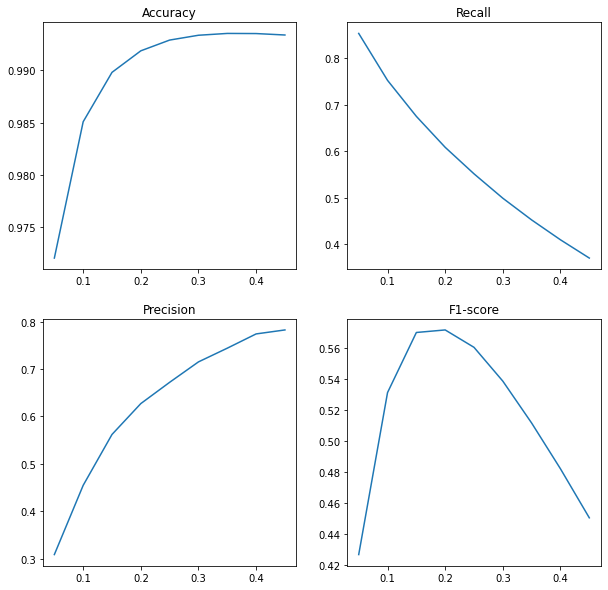

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].plot(min_positives, accs)
axs[0, 0].set_title("Accuracy")

axs[0, 1].plot(min_positives, recs)
axs[0, 1].set_title("Recall")

axs[1, 0].plot(min_positives, precs)
axs[1, 0].set_title("Precision")

axs[1, 1].plot(min_positives, f1s)
axs[1, 1].set_title("F1-score")

plt.show()

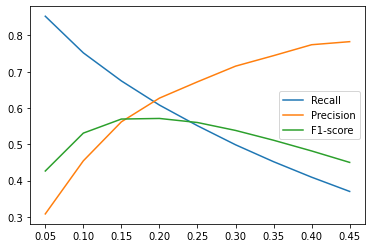

In [26]:
plt.plot(min_positives, recs, label="Recall")
plt.plot(min_positives, precs, label="Precision")
plt.plot(min_positives, f1s, label="F1-score")
plt.legend()
plt.show()

In [27]:
min_positive

0.45

In [28]:
print(f"Average accuracy: {np.mean(list(accuracy.values()))}")
print(f"Average recall: {np.mean(list(recall.values()))}")
print(f"Average precision: {np.mean(list(precision.values()))}")
print(f"Average F1-score: {np.mean(list(f1.values()))}")

Average accuracy: 0.9933539934492315
Average recall: 0.37031796876388595
Average precision: 0.7827820027714768
Average F1-score: 0.450254273306345


In [29]:
for subj in tqdm(target_2):
    y_pred = logits[subj].predict_proba(X_test_sparse)

    y_pred = [1 if x[1] > 0.2 else 0 for x in y_pred]
    accuracy[subj] = accuracy_score(y_test[subj], y_pred)
    recall[subj] = recall_score(y_test[subj], y_pred, zero_division=0)
    precision[subj] = precision_score(y_test[subj], y_pred, zero_division=0)
    f1[subj] = f1_score(y_test[subj], y_pred, zero_division=0)
    
    accs.append(np.mean(list(accuracy.values())))
    recs.append(np.mean(list(recall.values())))
    precs.append(np.mean(list(precision.values())))
    f1s.append(np.mean(list(f1.values())))

100%|██████████| 200/200 [01:34<00:00,  2.12it/s]


In [30]:
print(f"Average accuracy: {np.mean(list(accuracy.values()))}")
print(f"Average recall: {np.mean(list(recall.values()))}")
print(f"Average precision: {np.mean(list(precision.values()))}")
print(f"Average F1-score: {np.mean(list(f1.values()))}")

Average accuracy: 0.9918444192491811
Average recall: 0.6081793529329141
Average precision: 0.627271824387433
Average F1-score: 0.5713155815663864


# Удалим не английские тексты

In [99]:
from langdetect import detect

In [102]:
df.head()

,DOI,title,abstract,subject,cleaned_abstract,filtered_subject,all_fields,field_Art,field_Biology,field_Business,...,subj_Environmental Science (miscellaneous),subj_Biological Psychiatry,subj_Gender Studies,"subj_Safety, Risk, Reliability and Quality",subj_Urban Studies,subj_Genetics(clinical),subj_Agricultural and Biological Sciences (miscellaneous),subj_Museology,subj_Nephrology,subj_Logic
0,10.1163/1568525043083505,aristotle fr. 44 rose: midas and silenus,<jats:sec><jats:title>Abstract</jats:title><ja...,"[Classics, Linguistics and Language, Archaeolo...",abstract scholars have identified two supposed...,"[Archaeology, Classics, History, Language and ...","[Humanities, Humanities, Humanities, Humanitie...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10.1163/1568525043083532,loca loquuntur. lucretius' explanation of the ...,<jats:sec><jats:title>Abstract</jats:title><ja...,"[Classics, Linguistics and Language, Archaeolo...",abstract a discussion of the second part of lu...,"[Archaeology, Classics, History, Language and ...","[Humanities, Humanities, Humanities, Humanitie...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10.1163/1568525043083541,poverty and demography: the case of the gracch...,<jats:sec><jats:title>Abstract</jats:title><ja...,"[Classics, Linguistics and Language, Archaeolo...",abstract according to many ancient historians ...,"[Archaeology, Classics, History, Language and ...","[Humanities, Humanities, Humanities, Humanitie...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.1163/1568525043083514,old persian in athens revisited (ar. ach. 100),<jats:sec><jats:title>Abstract</jats:title><ja...,"[Classics, Linguistics and Language, Archaeolo...",abstract the old persian line in aristophanes ...,"[Archaeology, Classics, History, Language and ...","[Humanities, Humanities, Humanities, Humanitie...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10.1163/1568527053083412,religion and violence: what can sociology offer?,<jats:sec><jats:title>Abstract</jats:title><ja...,"[Religious studies, History]",abstract this essay presents a sketch of a soc...,"[History, Religious studies]","[Humanities, Humanities]",0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
df["lang"] = df["cleaned_abstract"].apply(detect)

In [104]:
df.head()

,DOI,title,abstract,subject,cleaned_abstract,filtered_subject,all_fields,field_Art,field_Biology,field_Business,...,subj_Biological Psychiatry,subj_Gender Studies,"subj_Safety, Risk, Reliability and Quality",subj_Urban Studies,subj_Genetics(clinical),subj_Agricultural and Biological Sciences (miscellaneous),subj_Museology,subj_Nephrology,subj_Logic,lang
0,10.1163/1568525043083505,aristotle fr. 44 rose: midas and silenus,<jats:sec><jats:title>Abstract</jats:title><ja...,"[Classics, Linguistics and Language, Archaeolo...",abstract scholars have identified two supposed...,"[Archaeology, Classics, History, Language and ...","[Humanities, Humanities, Humanities, Humanitie...",0,0,0,...,0,0,0,0,0,0,0,0,0,en
1,10.1163/1568525043083532,loca loquuntur. lucretius' explanation of the ...,<jats:sec><jats:title>Abstract</jats:title><ja...,"[Classics, Linguistics and Language, Archaeolo...",abstract a discussion of the second part of lu...,"[Archaeology, Classics, History, Language and ...","[Humanities, Humanities, Humanities, Humanitie...",0,0,0,...,0,0,0,0,0,0,0,0,0,en
2,10.1163/1568525043083541,poverty and demography: the case of the gracch...,<jats:sec><jats:title>Abstract</jats:title><ja...,"[Classics, Linguistics and Language, Archaeolo...",abstract according to many ancient historians ...,"[Archaeology, Classics, History, Language and ...","[Humanities, Humanities, Humanities, Humanitie...",0,0,0,...,0,0,0,0,0,0,0,0,0,en
3,10.1163/1568525043083514,old persian in athens revisited (ar. ach. 100),<jats:sec><jats:title>Abstract</jats:title><ja...,"[Classics, Linguistics and Language, Archaeolo...",abstract the old persian line in aristophanes ...,"[Archaeology, Classics, History, Language and ...","[Humanities, Humanities, Humanities, Humanitie...",0,0,0,...,0,0,0,0,0,0,0,0,0,en
4,10.1163/1568527053083412,religion and violence: what can sociology offer?,<jats:sec><jats:title>Abstract</jats:title><ja...,"[Religious studies, History]",abstract this essay presents a sketch of a soc...,"[History, Religious studies]","[Humanities, Humanities]",0,0,0,...,0,0,0,0,0,0,0,0,0,en


In [105]:
np.unique(df["lang"])

array(['af', 'ar', 'bg', 'ca', 'cs', 'cy', 'da', 'de', 'el', 'en', 'es',
       'et', 'fi', 'fr', 'he', 'hr', 'hu', 'id', 'it', 'ko', 'lt', 'lv',
       'nl', 'no', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl', 'so', 'sq', 'sv',
       'sw', 'th', 'tl', 'tr', 'uk', 'zh-cn'], dtype=object)

In [106]:
df_en = df[df["lang"] == "en"].copy()

In [107]:
df_en.shape

(1984464, 220)

In [108]:
df.shape

(2118438, 220)

In [110]:
df.shape[0] - df_en.shape[0]

133974

In [111]:
df_en.to_pickle("looong_df_subjects_en.pkl")